#### Week 1 - Systems Behavior and Optimization

Q1: Assume that the probability density of a function of a random variable X is given by:
* f(x) = ax(4-x), if 1<=x<=4 or 0 otherwise. 
* Where a is a constant number. 

Questions
* First, what is the value of a? 
* Next, compute the cumulative distribution function (cdf) on X. 
* Last, compute Expected value of E(X), E(X^2) and Var(X)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate #needed for integrations 

The value of a is: 0.1111111111111111


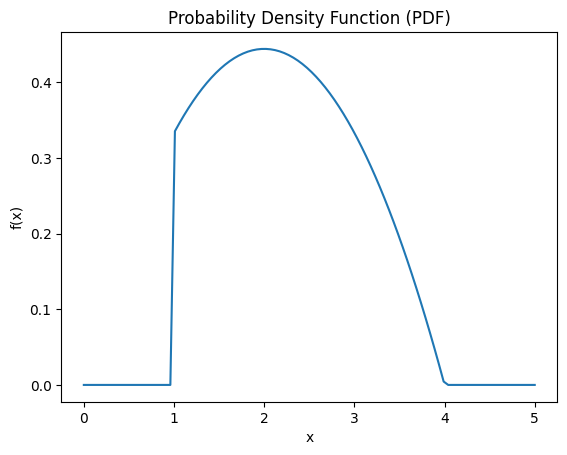

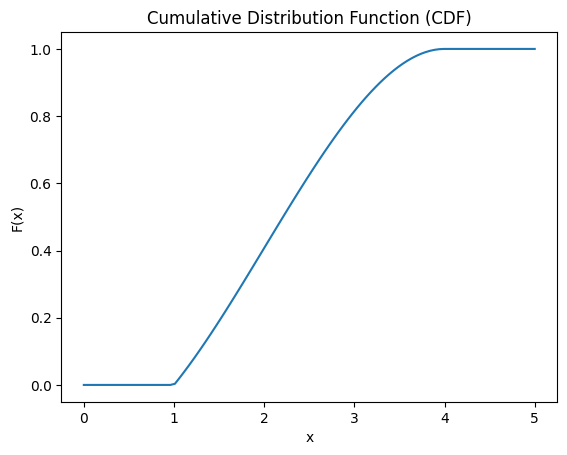

Expected value E(X) is: 2.25
Expected value E(X^2) is: 5.599999999999999
Variance Var(X) is: 0.5374999999999988


In [6]:
# Define the probability density function
def f(x, a):
  if 1 <= x <= 4:
    return a * x * (4 - x)
  else:
    return 0

# Calculate the value of a
def calculate_a():
  # Integrate f(x) over the range [1, 4] and set it equal to 1
  a = 1 / integrate.quad(lambda x: f(x, 1), 1, 4)[0]  # Use integrate.quad
  return a

# Calculate the cumulative distribution function (CDF)
def cdf(x, a):
  if x < 1:
    return 0
  elif 1 <= x <= 4:
    return integrate.quad(lambda t: f(t, a), 1, x)[0] # Use integrate.quad
  else:
    return 1

# Calculate the expected value E(X)
def expected_value(a):
  return integrate.quad(lambda x: x * f(x, a), 1, 4)[0]  # Use integrate.quad

# Calculate the expected value of X^2
def expected_value_x2(a):
  return integrate.quad(lambda x: x**2 * f(x, a), 1, 4)[0] # Use integrate.quad

# Calculate the variance Var(X)
def variance(a):
  return expected_value_x2(a) - expected_value(a)**2

# Calculate the value of a
a = calculate_a()

# Print the value of a
print(f"The value of a is: {a}")

# Plot the probability density function (PDF)
x = np.linspace(0, 5, 100)
plt.plot(x, [f(xi, a) for xi in x])
plt.title("Probability Density Function (PDF)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Plot the cumulative distribution function (CDF)
plt.plot(x, [cdf(xi, a) for xi in x])
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

# Calculate and print the expected value E(X)
E_X = expected_value(a)
print(f"Expected value E(X) is: {E_X}")

# Calculate and print the expected value E(X^2)
E_X2 = expected_value_x2(a)
print(f"Expected value E(X^2) is: {E_X2}")

# Calculate and print the variance Var(X)
Var_X = variance(a)
print(f"Variance Var(X) is: {Var_X}")

Q2: A phone company estimates that the probability density function for the length of a phone call in minutes is given by: 
* f(x) = (1/5)*e^(-x/5), if 0 <= x < infinity or 0 otherwise 

Questions 
(1) compute the probability that a call lasts more than 20 minutes.
(2) Compute the probability that a call lasts between 1/4 and 1/2 hour
(3) If a phone call lasts x minutes, then the company charges 4 - 3*e^(-x/5) dollars. Compute the expected revenue per call. 
(4) Similar to question 2, compute the probability that a call lasts between 0 and 5 minutes; the probability that a call lasts between 5 and 15 minutes; the probability that a call lasts between 15 and 30 minutes, and the probability that a call lasts more than 30 minutes. 
(5) Assume that the company adopts the following pricing scheme. if a call lasts between 0 and 5 minutes, then it charges 1 dollar; if a call lasts between 5 and 15 minutes, then it charges 1.70 dollars; if a call lasts more than 15 and 30 minutes it charges 2 dollars; if it lasts more than 30 minutes than it charges 3 dollars. Compute the expected revenue per call. 

In [7]:
import numpy as np
from scipy import integrate

# Define the probability density function
def f(x):
  if x >= 0:
    return (1/5) * np.exp(-x/5)
  else:
    return 0

# (1) Probability of a call lasting more than 20 minutes
def prob_more_than_20():
  return integrate.quad(f, 20, np.inf)[0]

# (2) Probability of a call lasting between 1/4 and 1/2 hour
def prob_between_15_30():
  return integrate.quad(f, 15, 30)[0]

# (3) Expected revenue per call
def expected_revenue():
  return integrate.quad(lambda x: (4 - 3*np.exp(-x/5)) * f(x), 0, np.inf)[0]

# (4) Probability of calls lasting in different intervals
def prob_intervals():
  prob_0_5 = integrate.quad(f, 0, 5)[0]
  prob_5_15 = integrate.quad(f, 5, 15)[0]
  prob_15_30 = integrate.quad(f, 15, 30)[0]
  prob_more_than_30 = integrate.quad(f, 30, np.inf)[0]
  return prob_0_5, prob_5_15, prob_15_30, prob_more_than_30

# (5) Expected revenue per call with new pricing scheme
def expected_revenue_new():
  prob_0_5, prob_5_15, prob_15_30, prob_more_than_30 = prob_intervals()
  return (1 * prob_0_5) + (1.70 * prob_5_15) + (2 * prob_15_30) + (3 * prob_more_than_30)

# Calculate and print the results
print(f"(1) Probability of a call lasting more than 20 minutes: {prob_more_than_20():.4f}")
print(f"(2) Probability of a call lasting between 1/4 and 1/2 hour: {prob_between_15_30():.4f}")
print(f"(3) Expected revenue per call: ${expected_revenue():.2f}")
prob_0_5, prob_5_15, prob_15_30, prob_more_than_30 = prob_intervals()
print(f"(4) Probability of call lasting between 0 and 5 minutes: {prob_0_5:.4f}")
print(f"(4) Probability of call lasting between 5 and 15 minutes: {prob_5_15:.4f}")
print(f"(4) Probability of call lasting between 15 and 30 minutes: {prob_15_30:.4f}")
print(f"(4) Probability of call lasting more than 30 minutes: {prob_more_than_30:.4f}")
print(f"(5) Expected revenue per call with new pricing scheme: ${expected_revenue_new():.2f}")

(1) Probability of a call lasting more than 20 minutes: 0.0183
(2) Probability of a call lasting between 1/4 and 1/2 hour: 0.0473
(3) Expected revenue per call: $2.50
(4) Probability of call lasting between 0 and 5 minutes: 0.6321
(4) Probability of call lasting between 5 and 15 minutes: 0.3181
(4) Probability of call lasting between 15 and 30 minutes: 0.0473
(4) Probability of call lasting more than 30 minutes: 0.0025
(5) Expected revenue per call with new pricing scheme: $1.27


Q3: You roll 5 dice. What is the chance that you get a full house (i.e. three dice showing one face and the other two showing another). 

Questions:
* Compute the answer by enumerating all 6^5 possibilities in a computer program 
* Compute it analytically 

In [8]:
import itertools

# (1) Enumerating all possibilities

def full_house_enumeration():
    """
    Calculates the probability of a full house by enumerating all possible dice rolls.
    """
    total_outcomes = 6**5  # 6 sides per die, 5 dice
    favorable_outcomes = 0
    for roll in itertools.product(range(1, 7), repeat=5):
        # Check if the roll is a full house
        if is_full_house(roll):
            favorable_outcomes += 1
    return favorable_outcomes / total_outcomes

def is_full_house(roll):
    """
    Checks if a dice roll is a full house.
    """
    counts = [roll.count(i) for i in range(1, 7)]
    return (3 in counts) and (2 in counts)

# Calculate and print the probability using enumeration
probability_enumeration = full_house_enumeration()
print(f"Probability of a full house (enumeration): {probability_enumeration:.4f}")

# (2) Analytical Calculation

def full_house_analytical():
    """
    Calculates the probability of a full house analytically.
    """
    # Choose the face for the three-of-a-kind: 6 choices
    # Choose the face for the pair: 5 choices
    # Arrange the three-of-a-kind within the roll: 5C3 ways
    # Arrange the pair within the roll: 2C2 ways (always 1 way)
    total_arrangements = 6 * 5 * (5 * 4 * 3) / (3 * 2) * 1  
    total_outcomes = 6**5  
    return total_arrangements / total_outcomes

# Calculate and print the probability analytically
probability_analytical = full_house_analytical()
print(f"Probability of a full house (analytical): {probability_analytical:.4f}")

Probability of a full house (enumeration): 0.0386
Probability of a full house (analytical): 0.0386
